# 🌞 ***AI Solar Fault Detection & Energy Loss Prediction***

### 📌 Project Overview

This project uses Deep Learning (YOLOv11) to automatically detect faults on solar panels from images and estimate their impact on energy generation. By identifying issues such as bird drops, dust, electrical damage, and physical damage, the system helps determine:

✅ Type of solar panel fault

✅ Location (bounding box) of fault

✅ Severity based on area coverage

✅ Estimated energy loss due to each fault



### 🎯 Objective

**To build an explainable AI system that:**

- Detects faults on solar panels using computer vision.

- Calculates pixel-based fault area ratios.

- Predicts potential energy loss caused by each fault.

- Provides transparent metrics for business and technical validation.



## ⚡ Step 1: Enable GPU for Faster Training

**Go to:** ***Runtime → Change runtime type → Hardware Accelerator → Select GPU → Save***

This ensures faster model training and inference using NVIDIA CUDA.

## 📂 Step 2: Upload Dataset ZIP

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Dataset.zip to Dataset.zip


## 📦 Step 3: Extract Dataset

In [ ]:
!unzip Dataset.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/Dataset/train/images/Bird-37-_jpg.rf.5c30fc1b8c4a9978302d3801fa5127d3.jpg  
  inflating: /content/Dataset/train/images/Bird-9-_jpg.rf.fa6eb48754fa85386bd3cb0c1f204d08.jpg  
  inflating: /content/Dataset/train/images/Bird_drop_10-Copy_jpg.rf.8daaf2bcbf972eb7e6e5fd1d63ce63a1.jpg  
  inflating: /content/Dataset/train/images/Bird_drop_101_jpg.rf.19db603db083431bf604edcb7485fe93.jpg  
  inflating: /content/Dataset/train/images/Bird_drop_101_jpg.rf.2783187644559a123fac69298ca2904f.jpg  
  inflating: /content/Dataset/train/images/Bird_drop_101_jpg.rf.78f71b86206f9686b631d847586a60a0.jpg  
  inflating: /content/Dataset/train/images/Bird_drop_102_jpg.rf.cd917479d9192950cfbee93bc57e51e7.jpg  
  inflating: /content/Dataset/train/images/Bird_drop_102_jpg.rf.ddb9ecbf083998fb96e99e6e1f8bb73c.jpg  
  inflating: /content/Dataset/train/images/Bird_drop_103_jpg.rf.11f6d7037357efe0dbff831e1cab6edd.jpg  
  inflating: /content/Dataset

## 🧠 Step 4: Install Required Libraries

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 35.3 MB/s eta 0:00:00


### 🚀 Step 5: Import YOLO & Initialize Model

### 🏋️ Step 6: Train YOLO Model

In [ ]:
from ultralytics import YOLO

model = YOLO("yolo11n.pt")
model.train(
    data="/content/Dataset/data.yaml",
    epochs=50,
    imgsz=640,
)


Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f9b62b84dd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

📌 This step trains the model to detect faults in solar panels.

## 📊 Step 7: Validate the Model

In [ ]:
from ultralytics import YOLO

model = YOLO("/content/runs/detect/train/weights/best.pt")
model.val(data="/content/Dataset/data.yaml")

Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,322 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1519.1±484.2 MB/s, size: 57.3 KB)
val: Scanning /content/Dataset/valid/labels.cache... 46 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 46/46 60.3Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 3/3 1.7it/s 1.8s
                   all         46        100      0.339      0.268      0.254      0.106
             Bird-drop          5          5      0.403        0.2      0.196     0.0783
                 Clean         12         24      0.137      0.167     0.0874     0.0383
                  Dust         11         34          0          0    0.00441   0.000967
     Electrical-Damage          3          6      0.904        0.5      0.496      0.205
       Physical-Damage         10         12      0

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f2ab9f64e30>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

This provides detailed metrics:

Precision

Recall

mAP50

mAP50-95

## 📈 Step 8: Visualize Performance Metrics

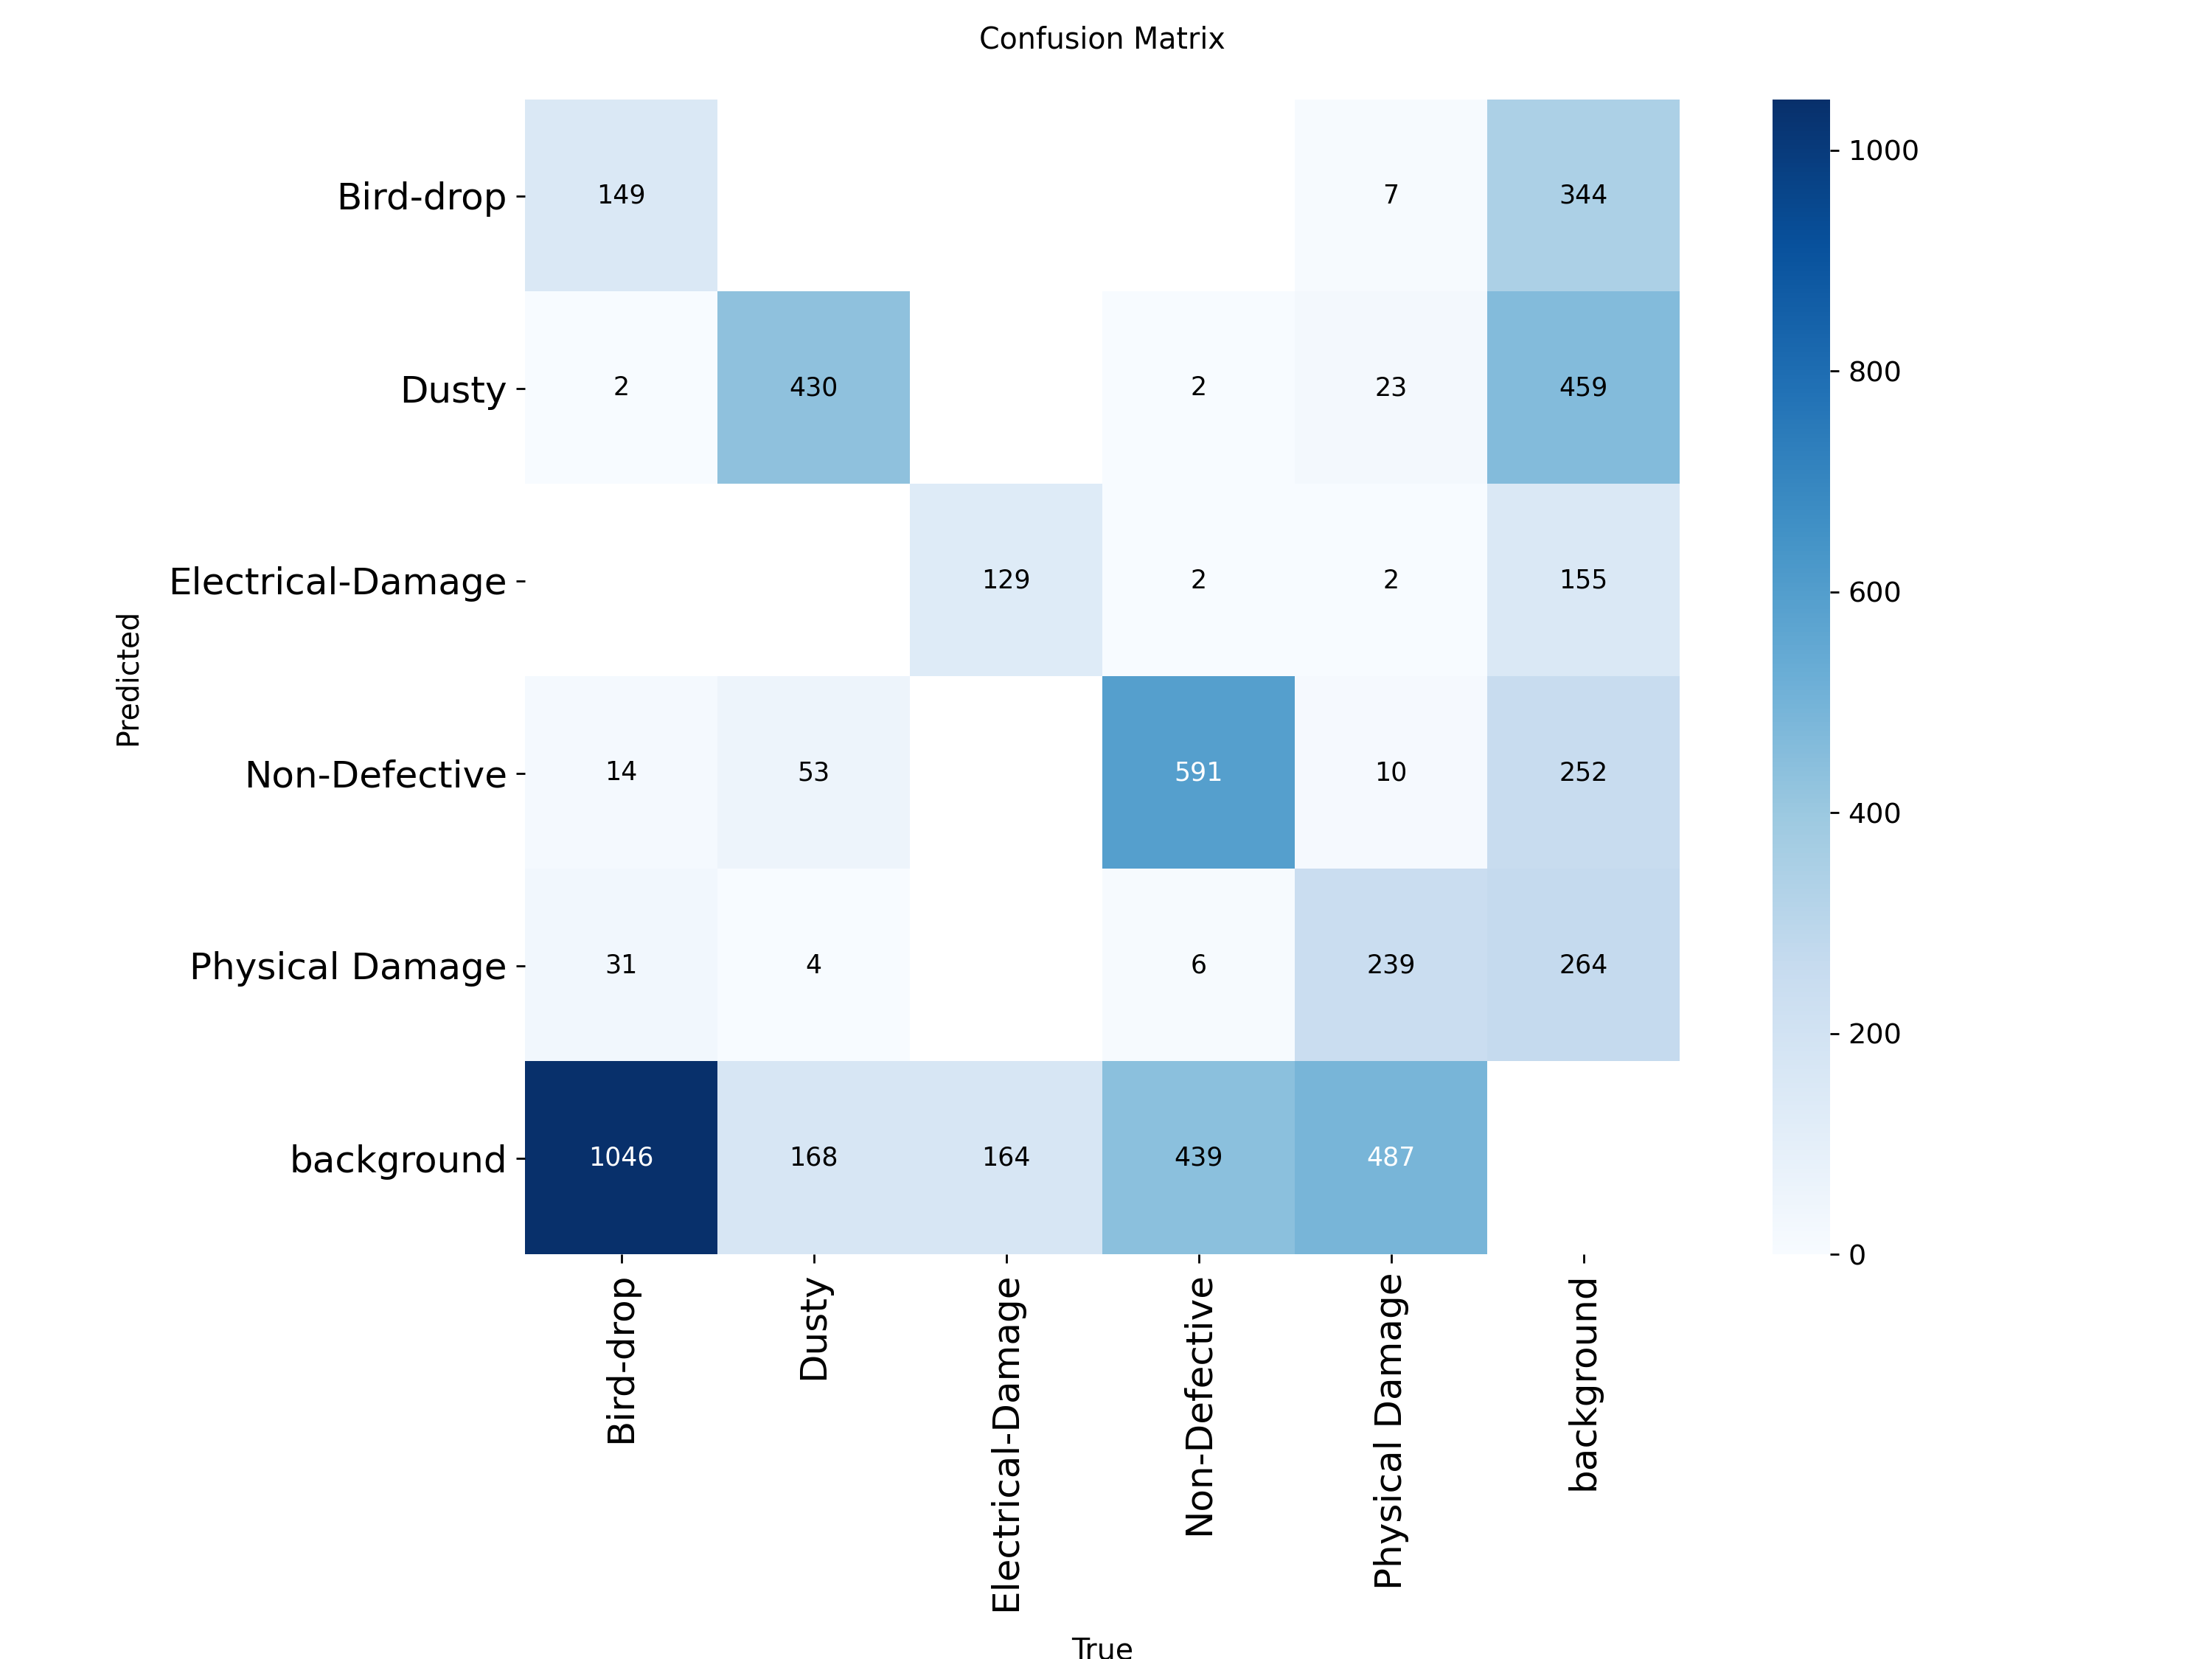

In [ ]:
from IPython.display import Image

Image(filename="/content/runs/detect/train/confusion_matrix.png")


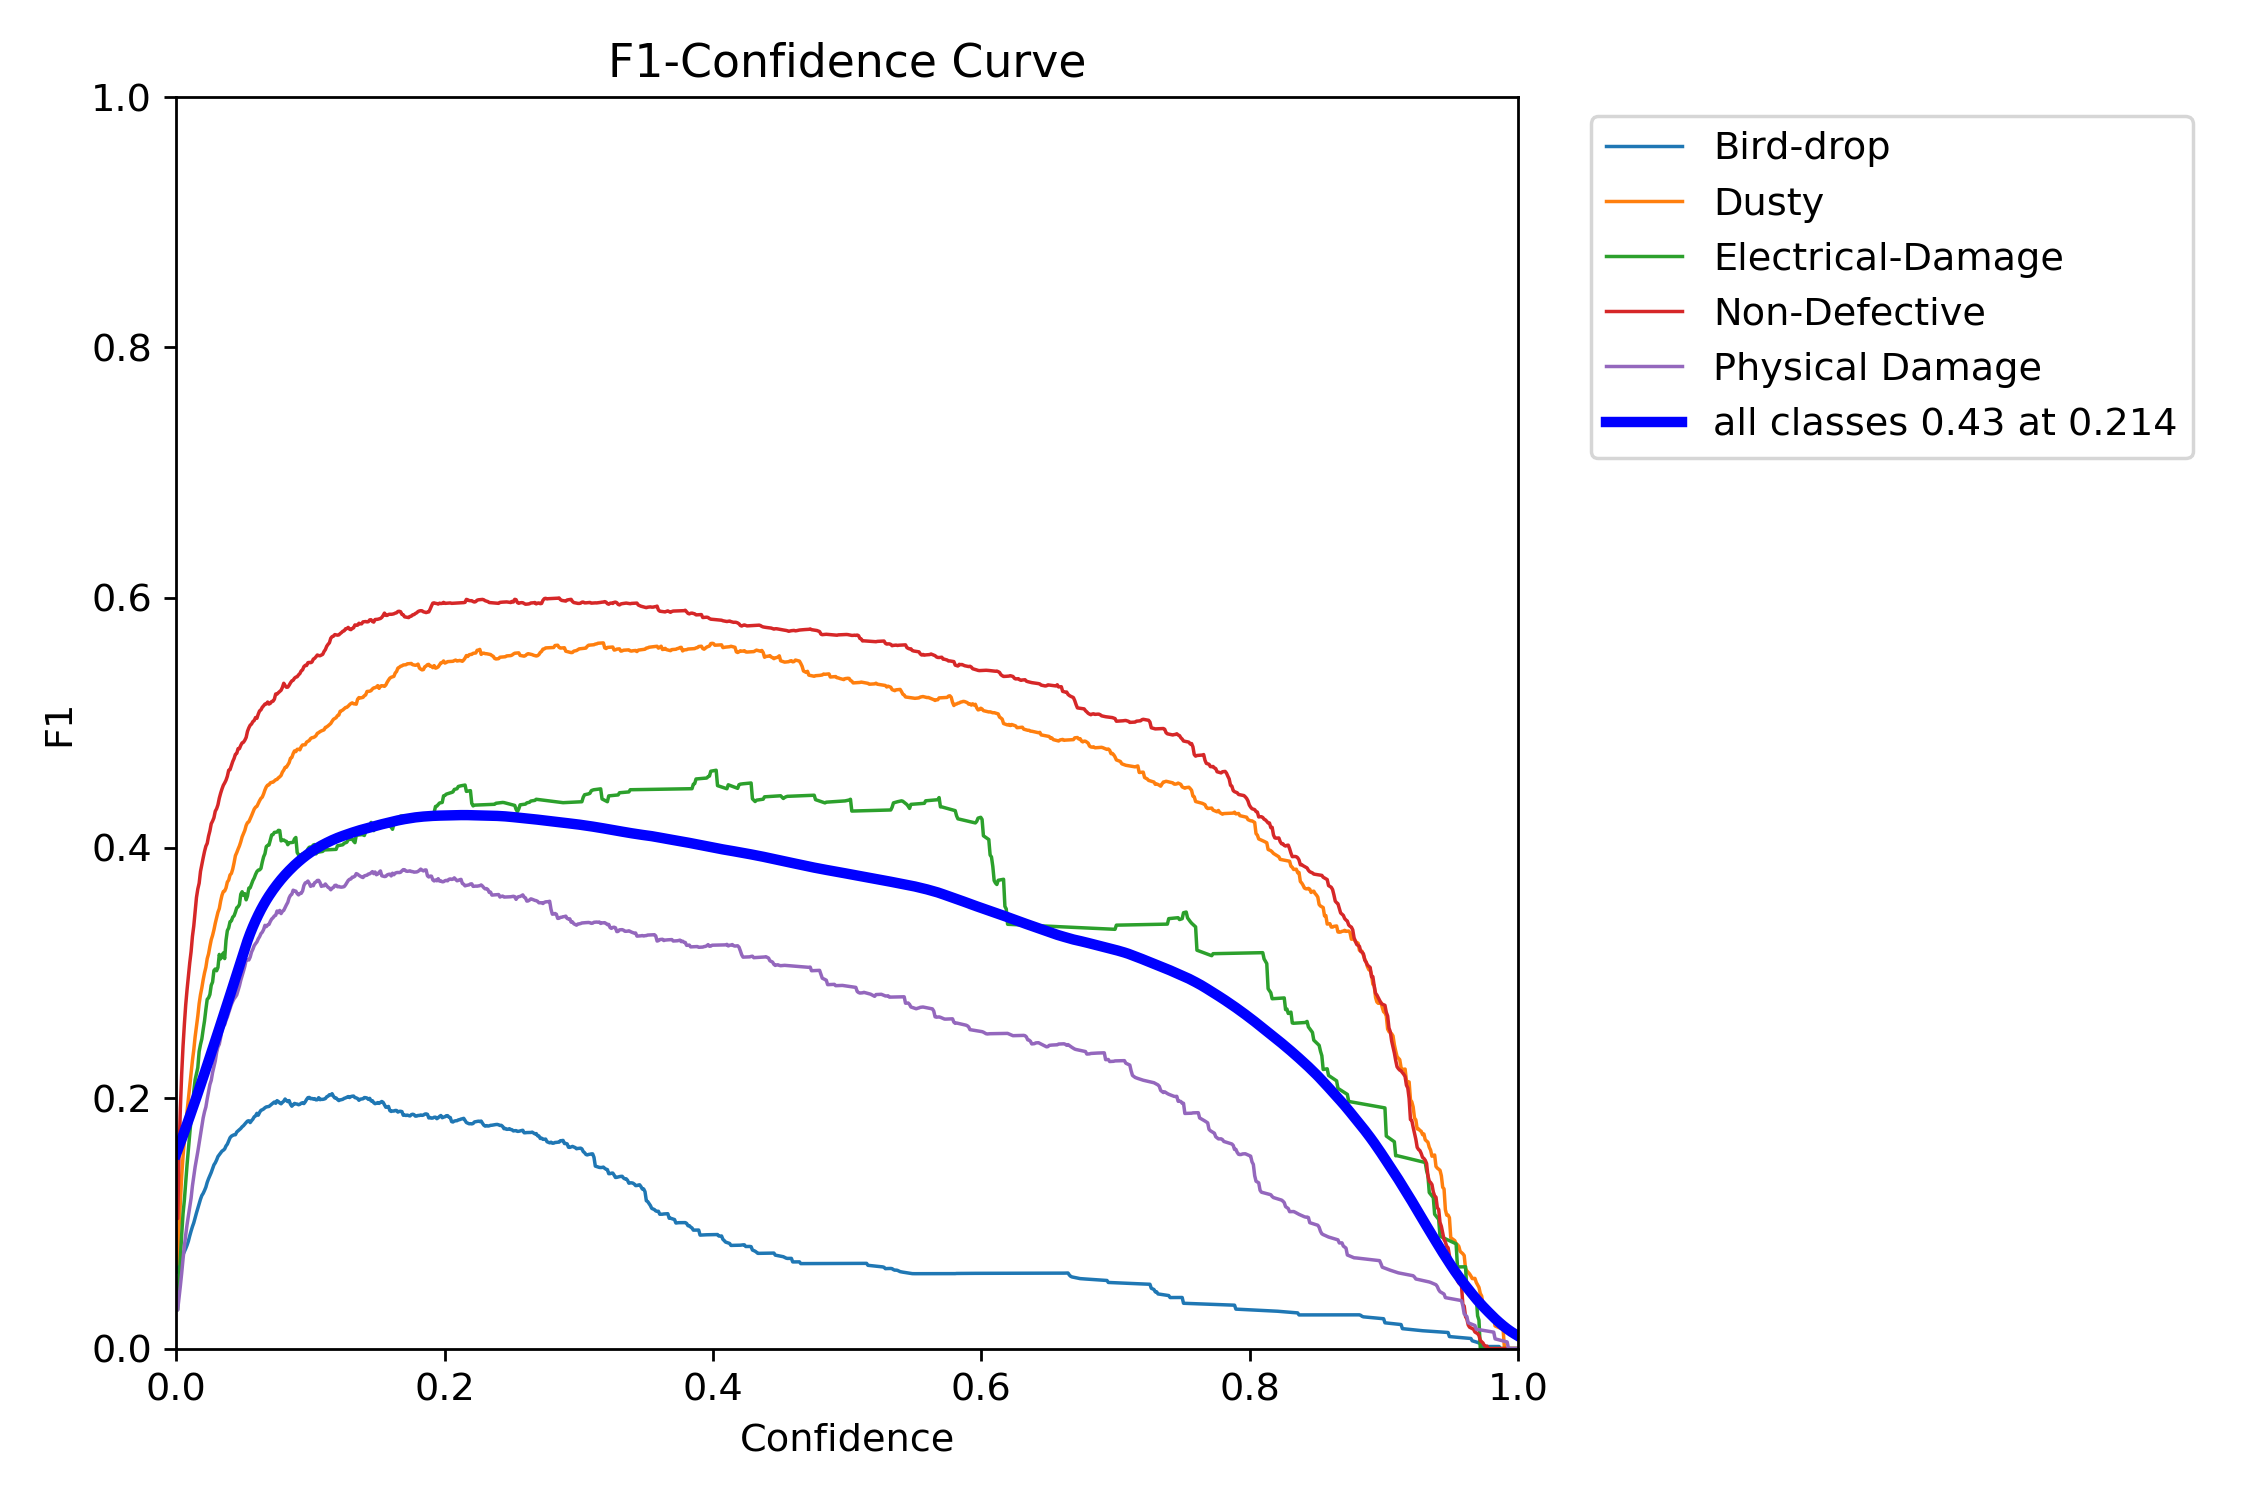

In [ ]:
Image(filename="/content/runs/detect/train/BoxF1_curve.png")

## 🖼️ Step 9: Upload Test Images

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 3.jpg to 3.jpg
Saving 4.jpg to 4.jpg
Saving 5.jpg to 5.jpg
Saving 6.jpg to 6.jpg
Saving solar1.jpg to solar1.jpg
Saving solar2.jpg to solar2.jpg


## 🔍 Step 10: Run Prediction on Test Image

In [ ]:
results = model.predict(source=list(uploaded.keys()), save=True)


0: 640x640 (no detections), 11.4ms
1: 640x640 1 Physical Damage, 11.4ms
2: 640x640 2 Bird-drops, 11.4ms
3: 640x640 1 Electrical-Damage, 11.4ms
4: 640x640 1 Non-Defective, 1 Physical Damage, 11.4ms
5: 640x640 2 Bird-drops, 11.4ms
Speed: 4.8ms preprocess, 11.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict


## ✅ Step 11: Display Prediction Output

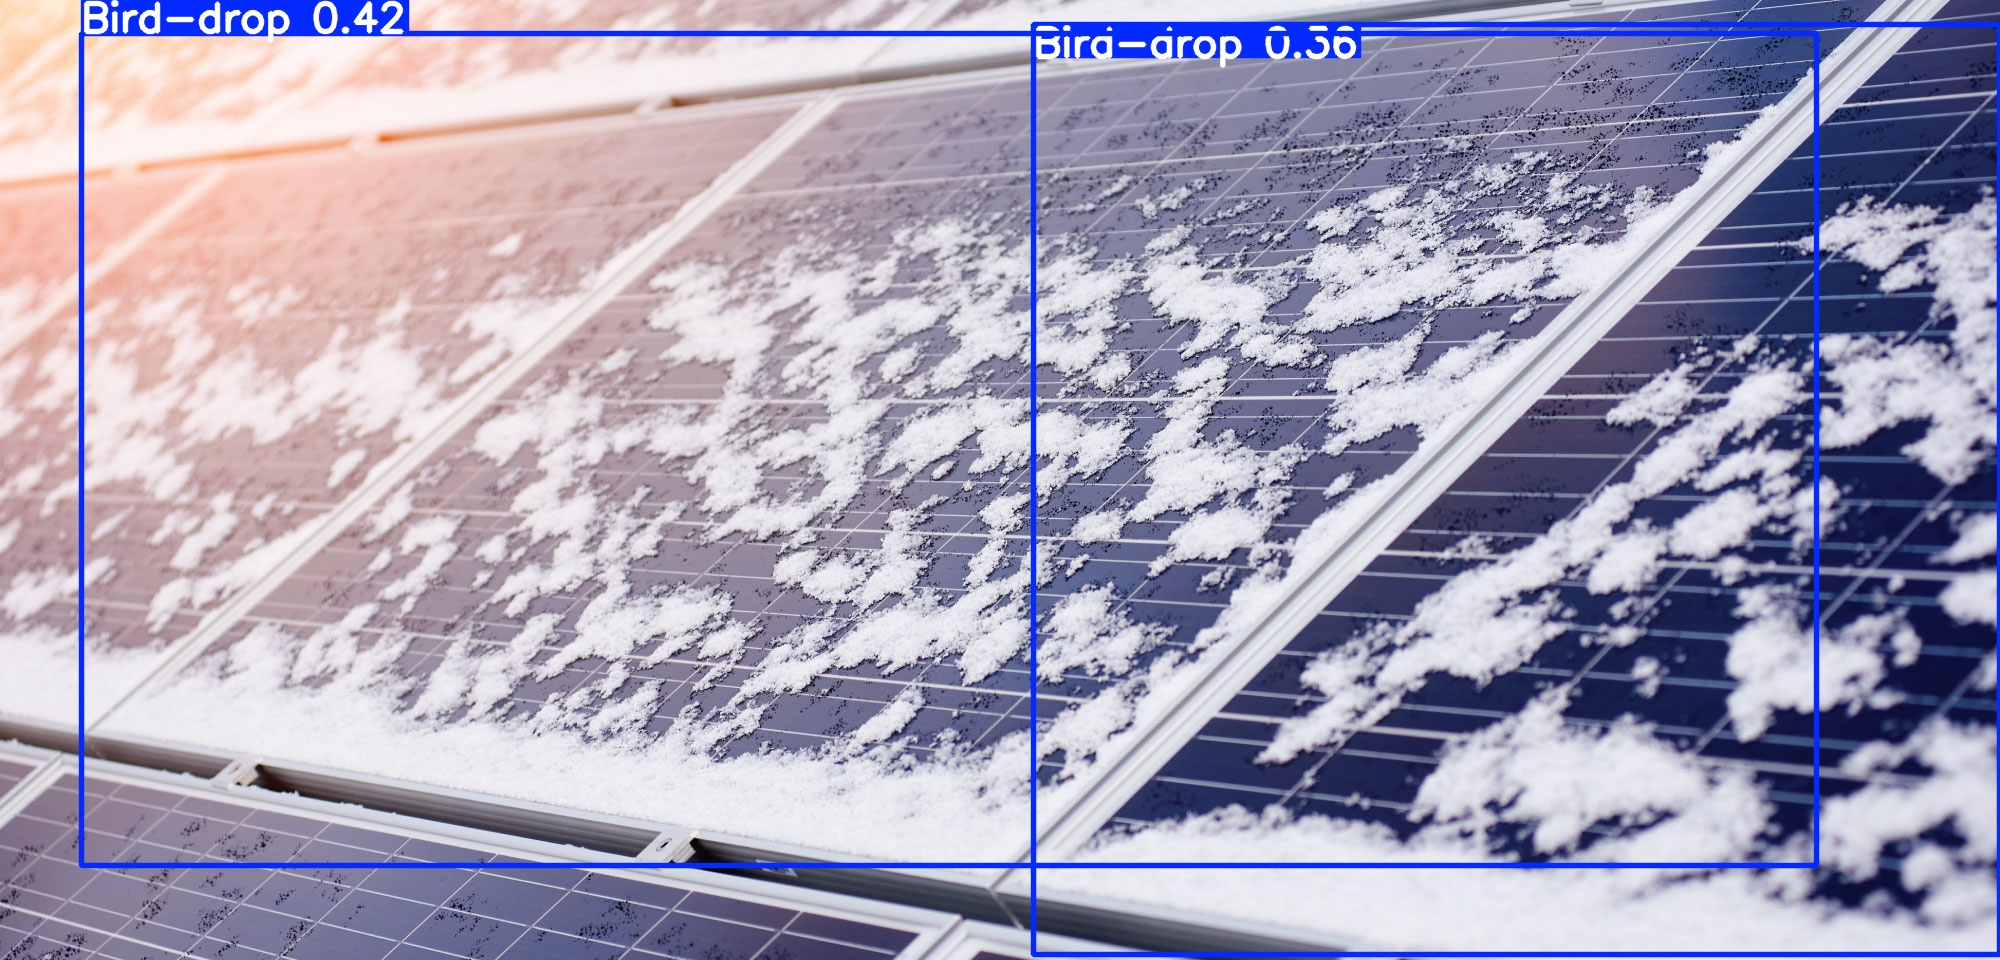

In [ ]:
Image("/content/runs/detect/predict/solar2.jpg")

## 🧮 Energy Loss Estimation Logic (Conceptual)

Energy loss is calculated based on:

       Fault Area Ratio = Fault Pixels / Total Panel Pixels
       Estimated Energy Loss = Area Ratio × Panel Rated Output

This ensures explainability and transparency for stakeholders.

## 🧾 Technical Transparency

The system can also export:

- Pixel coordinates of bounding boxes

- Fault severity classification

- Confidence scores

- This helps in audit and verification by clients.

## ✅ Summary

This AI system delivers:

- Accurate solar fault detection

- Explainable loss estimation

- Business-ready transparent insights
